# Tensorflow - red por muestra

Recopilacion de modelos implementados principalmente usando tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 8 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

2024-04-17 00:44:45.202189: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 00:44:45.273906: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-17 00:44:45.275252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 00:44:46.784108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Procedemos entontes a la carga y preprocesado de datos. 

In [4]:
datos_crudos = "../../data/1-intermedia/resumen-comportamientos_Matilda_dataset_single_row.csv"

Comenzamos analizando los datos de entrada. Revisamos el tamaño, la forma y las columnas que tiene.

In [5]:
data_raw = pd.read_csv(datos_crudos)

In [6]:
# Do we have NaN values in data_raw?
print(f"NaN values: {data_raw.isna().sum().sum()}")

NaN values: 0


In [4]:
data_raw.describe()

,x,y,z,ODBA
count,12400.000000,12400.000000,12400.000000,12400.000000
mean,0.211554,0.118672,0.755789,0.294454
std,0.377460,0.263951,0.299120,0.266990
min,-1.546900,-1.265600,-3.906300,0.003100
25%,0.000000,-0.031300,0.656300,0.100606
50%,0.125000,0.140600,0.875000,0.224550
75%,0.359400,0.296900,0.937500,0.404690
max,2.328100,1.250000,1.515600,7.951573


In [5]:
data_raw.shape

(12400, 5)

In [6]:
data_raw.columns

Index(['x', 'y', 'z', 'ODBA', 'Comportamiento'], dtype='object')

Usamos seaborn para graficar la cantidad de muestras que tenemos por cada tipo de comportamiento.

Text(0.5, 1.0, 'Comportamiento de Matilda')

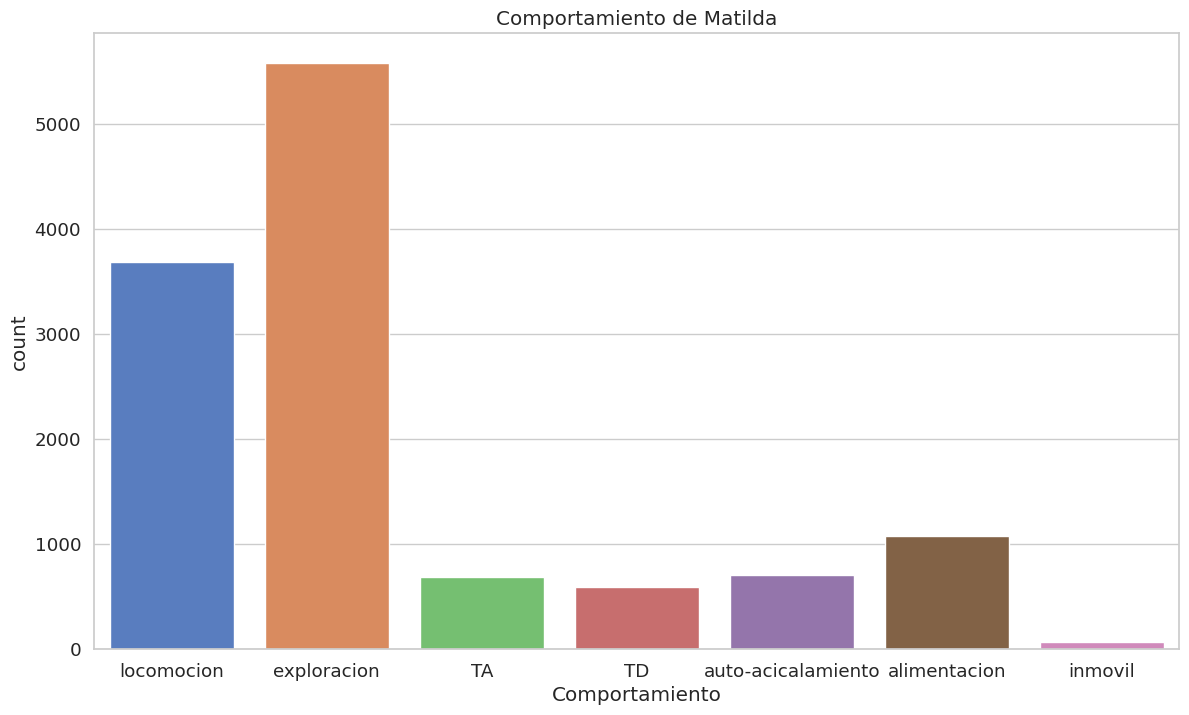

In [7]:
f = sns.countplot(x='Comportamiento', data=data_raw)
f.set_title('Comportamiento de Matilda')

Removemos los outliers, valores de ODBA fuera de rangos logicos generales. Vamos a considerar 3 desviaciones estandar, lo que se llama numero de z-scores. Esto es porque los valores fuera de 3 desviaciones estandard de la media no tienen mucha logica de ser. 

In [8]:
# Calculate z-scores for ODBA column
data_raw['ODBA_zscore'] = (data_raw['ODBA'] - data_raw['ODBA'].mean()) / data_raw['ODBA'].std()

# Define a threshold for z-score
threshold = 3

# Remove rows with ODBA z-score greater than the threshold
data_raw = data_raw[data_raw['ODBA_zscore'] <= threshold]

# Remove the ODBA_zscore column
data_raw = data_raw.drop('ODBA_zscore', axis=1)

NaN values: 0


Procedemos a graficar las dispersiones de los comportamientos registrados con distintos puntos de colores de acuerdo a los valores medidos de _X_, _Y_ y _Z_ vs el _ODBA_

<Axes: xlabel='ODBA', ylabel='x'>

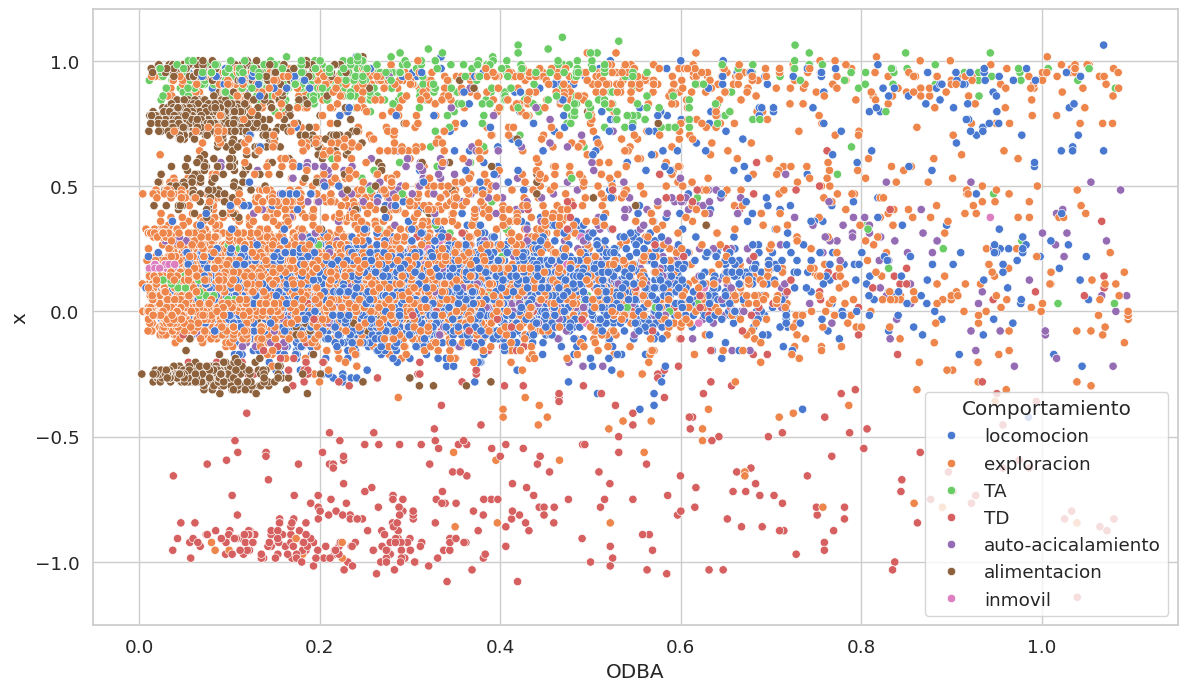

In [ ]:
sns.scatterplot(x='ODBA', y='x', hue='Comportamiento', data=data_raw, palette='muted')

<Axes: xlabel='ODBA', ylabel='y'>

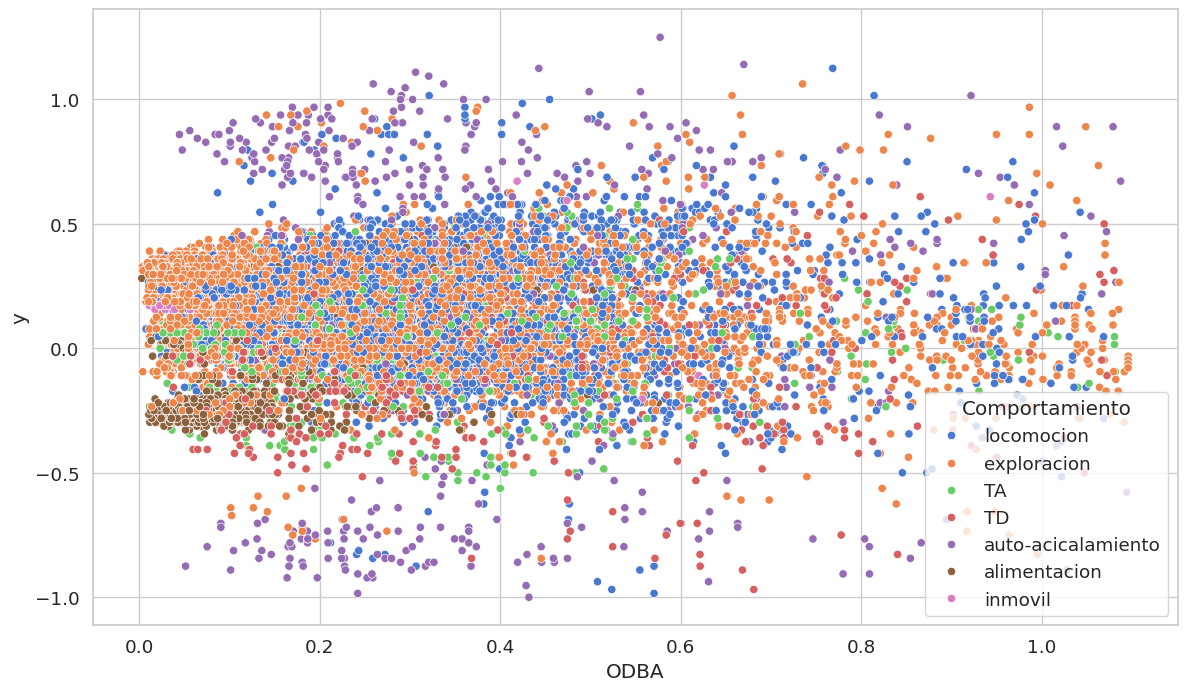

In [ ]:
sns.scatterplot(x='ODBA', y='y', hue='Comportamiento', data=data_raw, palette='muted')


<Axes: xlabel='ODBA', ylabel='z'>

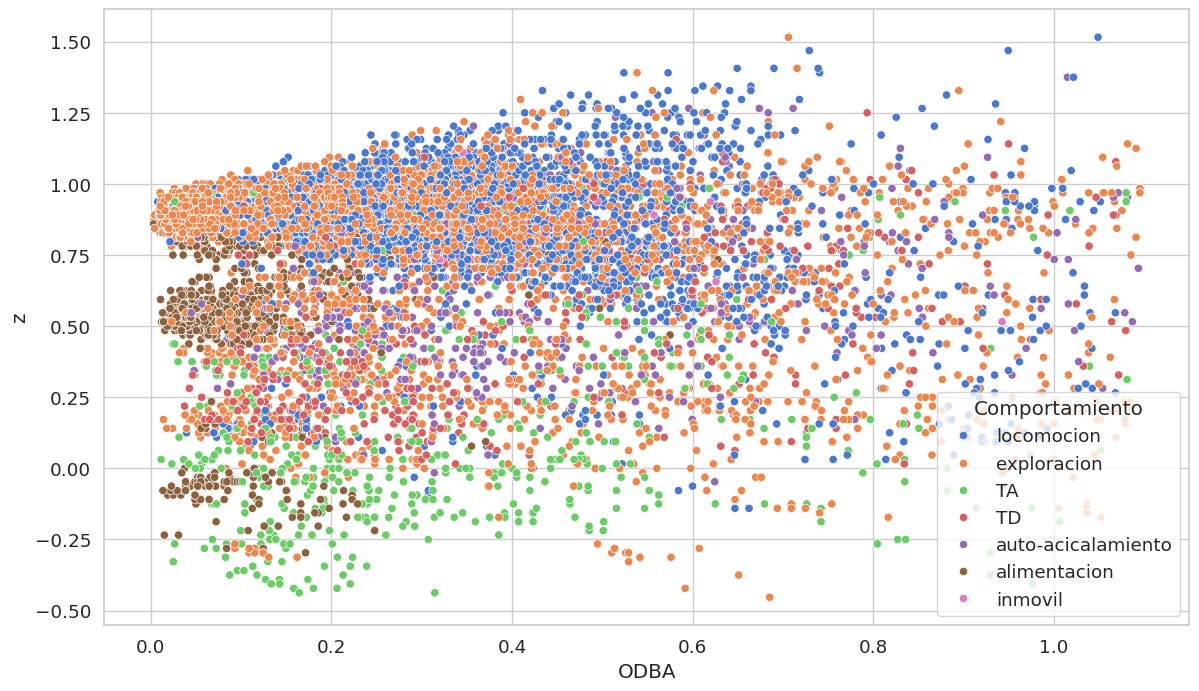

In [ ]:
sns.scatterplot(x='ODBA', y='z', hue='Comportamiento', data=data_raw, palette='muted')

Procedemos a escalar los datos para que tengan valores entre -1 y 1, para darle de ingesta al modelo de red neuronal, cuyas capas de entrada reciben valores continuos entre esos valores, usando el objeto MinMaxScaler de la librería Scikit Learn.  

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a new dataframe with the columns x, y, z, and ODBA
scaled_data_raw = data_raw[['x', 'y', 'z', 'ODBA']].copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Normalize the values in the new dataframe
scaled_data_raw[['x', 'y', 'z', 'ODBA']] = scaler.fit_transform(scaled_data_raw[['x', 'y', 'z', 'ODBA']])

# Add "Comportamiento" column to the scaled dataframe
scaled_data_raw['Comportamiento'] = data_raw['Comportamiento']

data_raw.describe()

,x,y,z,ODBA
count,12190.000000,12190.000000,12190.000000,12190.000000
mean,0.211228,0.120210,0.757939,0.277005
std,0.373648,0.262281,0.294094,0.224302
min,-1.140600,-1.000000,-0.453100,0.003100
25%,0.000000,-0.031300,0.656300,0.099404
50%,0.125000,0.140600,0.875000,0.219830
75%,0.359400,0.296900,0.937500,0.391178
max,1.093800,1.250000,1.515600,1.095410


Volvemos a graficar para 

<Axes: xlabel='ODBA', ylabel='x'>

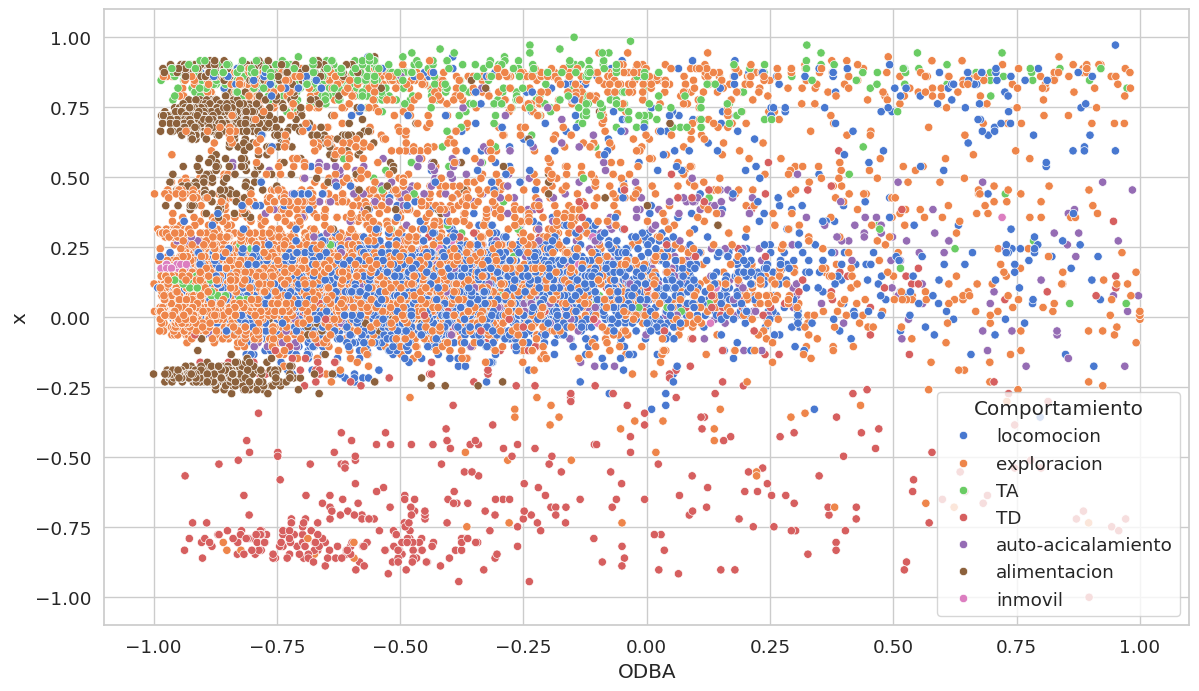

In [ ]:
sns.scatterplot(x='ODBA', y='x', hue='Comportamiento', data=scaled_data_raw, palette='muted')

<Axes: xlabel='ODBA', ylabel='y'>

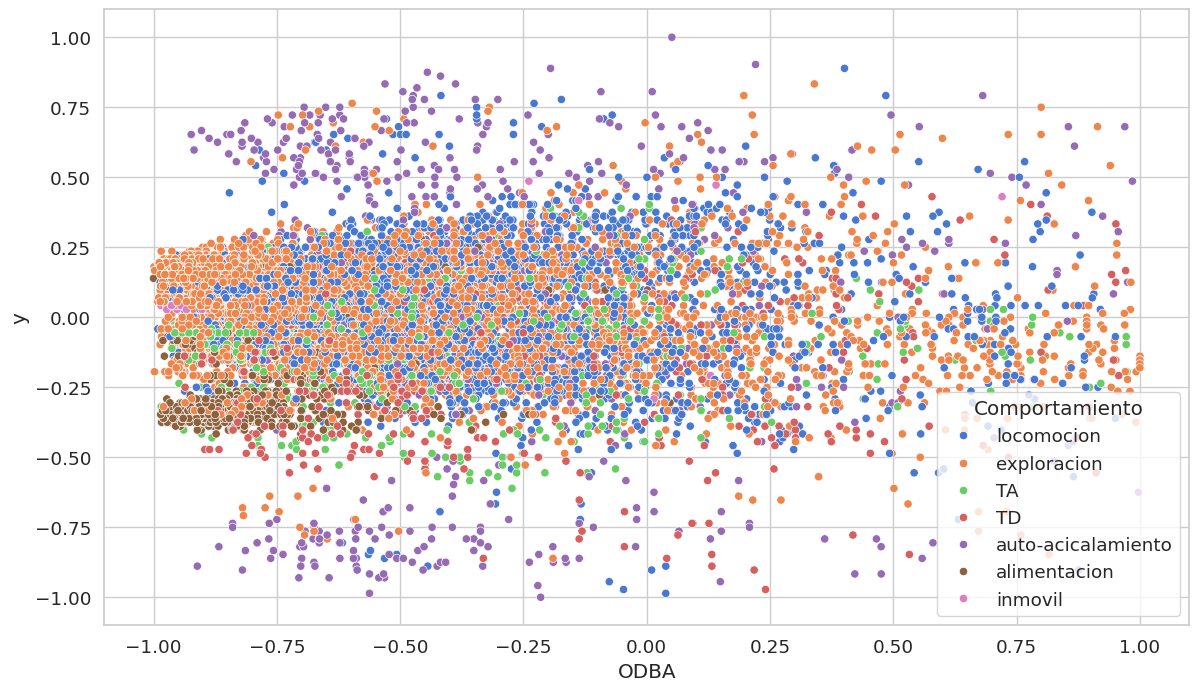

In [ ]:
sns.scatterplot(x='ODBA', y='y', hue='Comportamiento', data=scaled_data_raw, palette='muted')

In [ ]:
sns.scatterplot(x='ODBA', y='z', hue='Comportamiento', data=scaled_data_raw, palette='muted')

NameError: name 'sns' is not defined

Scatter plot tridimensional con los valores de x, y y z.

/tmp/ipykernel_32871/3751619529.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('rainbow', len(unique_categories))
/home/jbaez/.local/lib/python3.11/site-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


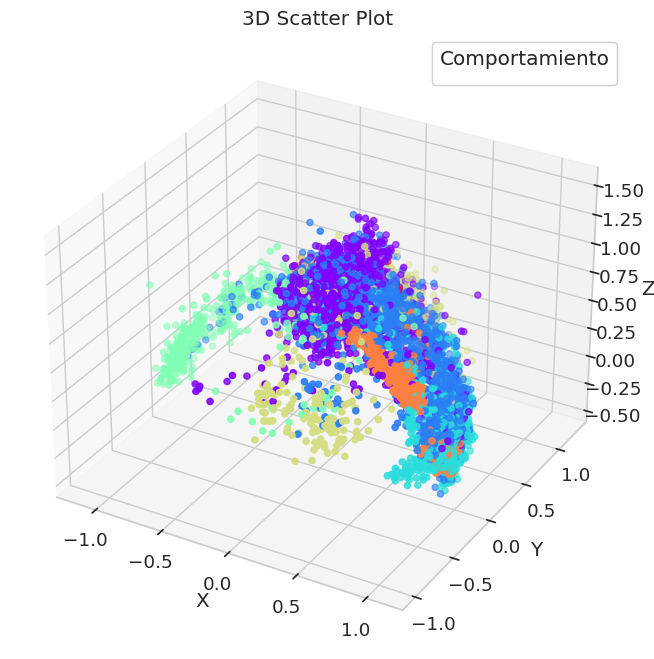

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Create a color map
unique_categories = data_raw['Comportamiento'].unique()
colors = plt.cm.get_cmap('rainbow', len(unique_categories))
color_map = dict(zip(unique_categories, colors(range(len(unique_categories)))))

# Map 'Comportamiento' to colors
data_raw['Color'] = data_raw['Comportamiento'].map(color_map)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data_raw['x'], data_raw['y'], data_raw['z'], c=data_raw['Color'])

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')

# Create a legend
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, unique_categories, title="Comportamiento")

# Show the color mapping in the plot
ax.add_artist(legend1)

plt.show()


In [16]:
# Create new model with 4 columns as input, "Comportamiento" as cathegorical output, and 1 hidden layer with half the number of outputs

model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(units=7, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
 dense_2 (Dense)             (None, 7)                 42        
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Perform test-train split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

# Print the shapes of the train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Prepare training and validation data for model.fit()
X_train = train_data.drop(columns=['Comportamiento'])
y_train = train_data['Comportamiento']
X_test = test_data.drop(columns=['Comportamiento'])
y_test = test_data['Comportamiento']


NameError: name 'data' is not defined

In [72]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
# Convert the target variable to categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded)

# Compile and fit the model with the one-hot encoded target variable
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=1, use_multiprocessing=True)


Epoch 1/100
9752/9752 [==============================] - 15s 1ms/step - loss: 0.9283 - accuracy: 0.6164
Epoch 2/100
9752/9752 [==============================] - 14s 1ms/step - loss: 0.9270 - accuracy: 0.6175
Epoch 3/100
 241/9752 [..............................] - ETA: 14s - loss: 0.9129 - accuracy: 0.6307

KeyboardInterrupt: 

---

## Training checkpoint! 
Arriba se guardaron un par de modelos entrenados, ahora podemos cargarlos para poder a volver evaluarlos mejor.

In [18]:
# Load model
model = keras.models.load_model('model_data_single_row_1706077107.h5')

In [1]:
# Save model with the name "model_" + the current date and time as h5 file
model.save("model_data_single_row_" + datetime.now().strftime("%Y%m%d-%H%M%S") + ".h5")

NameError: name 'model' is not defined

In [65]:
from keras.utils import to_categorical
# Convert the target variable to one-hot encoded format
y_test_encoded = label_encoder.transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded)

# Evaluate the model with the one-hot encoded target variable
model.evaluate(X_test, y_test_one_hot)


77/77 [==============================] - 0s 1ms/step - loss: 0.9155 - accuracy: 0.6161


[0.9154819846153259, 0.6160787343978882]

KeyError: 'val_acc'

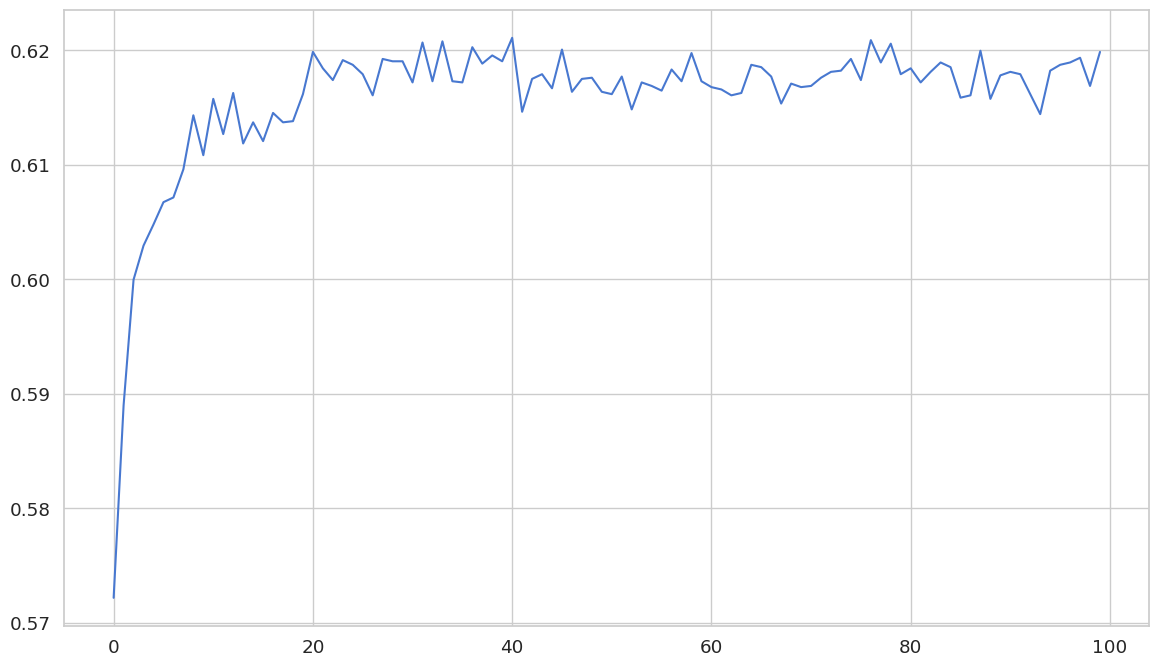

In [71]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

KeyError: 'val_loss'

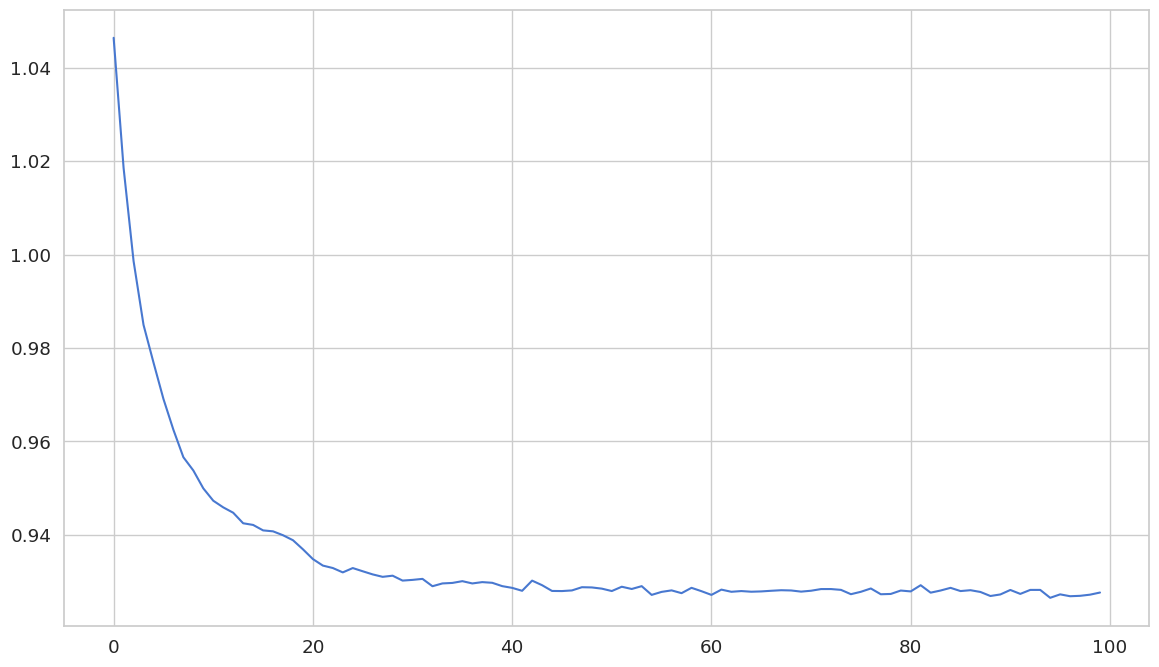

In [67]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
print(X_test.shape)
print(y_test.shape)

(2438, 4)
(2438,)


In [76]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
bin_predictions = tf.round(predictions).numpy().astype(int)
print(classification_report(y_test, bin_predictions))

77/77 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [78]:
y_test_single_label = np.argmax(y_test_one_hot, axis=1)
bin_predictions_single_label = np.argmax(bin_predictions, axis=1)
cfn_matrix = confusion_matrix(y_test_single_label, bin_predictions_single_label)
print(cfn_matrix)

[[ 72   0   6   0  46   0   4]
 [ 26  55   5   2   5   0   4]
 [ 37   0 169   0  12   0   2]
 [ 77   0   2  14  25   0  23]
 [241   6   4   1 704   0 167]
 [  3   0   0   0   6   0   0]
 [273   0   0   1 223   0 223]]


Text(0.5, 709.5555555555555, 'Comportamiento predicho')

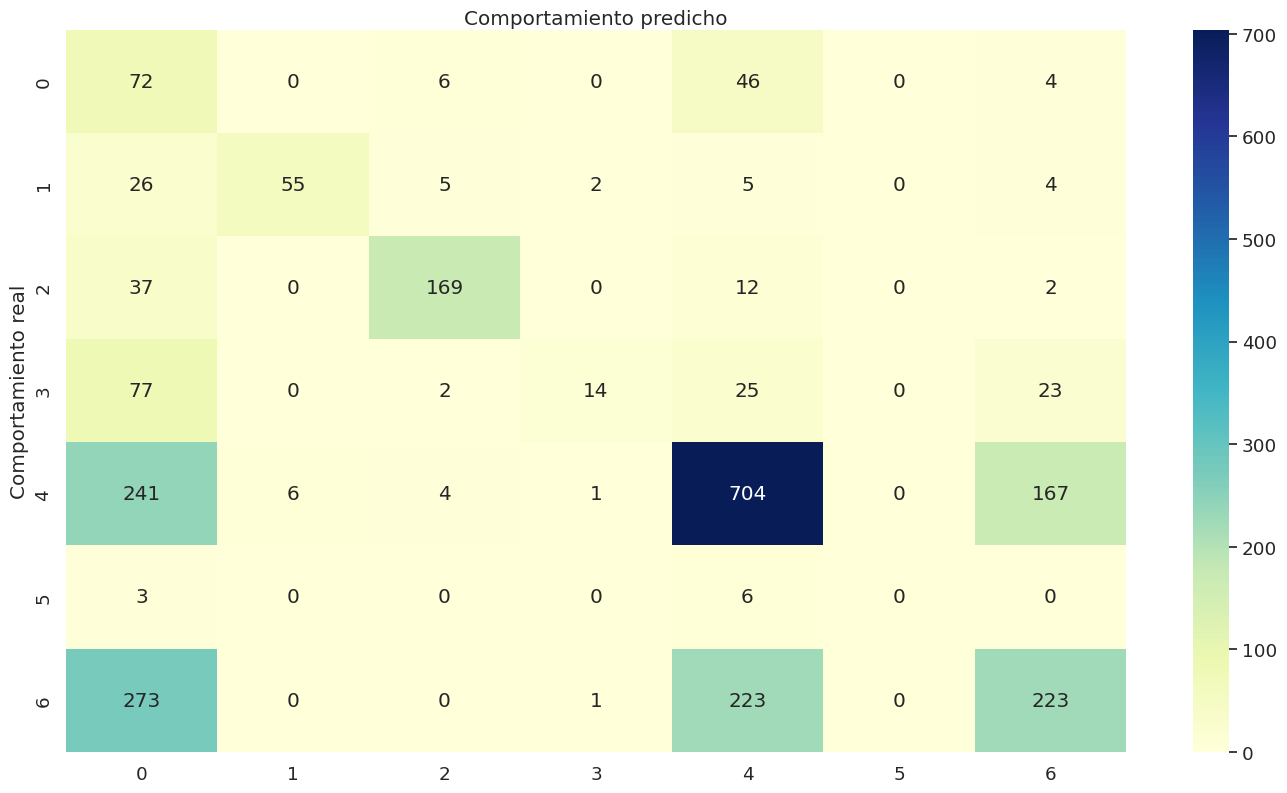

In [79]:
import matplotlib.pyplot as plt
class_names = data['Comportamiento'].unique()
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cfn_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Comportamiento real')
plt.xlabel('Comportamiento predicho')

Vemos que esta interpretacion base no se comporta del todo bien que digamos, un 60% de accuracy nada mas. Igual podemos ver que capaz un problema que no corregimos fue la desproporcionalidad de muestras de cada evento en la celda superior. Podriamos emparejar los numeros de muestra para ver que tan bien se comporta esta red base. 